In [57]:
import numpy.random as rand
import matplotlib.pyplot as plt
import scipy.stats as st

count = 10000

P = [
    [0.13, 0.04, 0.19],
    [0.08, 0.15, 0.07],
    [0.11, 0.11, 0.12]]
#    0.32, 0.30, 0.38

sum_by_x = []
x = 0
for i in range(len(P[0])):
    for j in range(len(P)):
        x += P[j][i]
    sum_by_x.append(x)


def get_x_index(value):
    for i in range(len(sum_by_x)):
        if value < sum_by_x[i]:
            return i


def get_y_index_by_x(value, x_index):
    y = 0
    for i in range(len(P)):
        y += P[i][x_index]
        if value < y:
            return i
    print("ERROR: value = ", value)

In [58]:
rand_x = rand.randint(0, 999, count) / 1000
rand_y = rand.randint(0, 999, count) / 1000
result = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]]
for i in range(count):
    x_index = get_x_index(rand_x[i])
    sum_one_line = 0
    for j in range(len(P)):
        sum_one_line += P[j][x_index]
    y_variant = rand_y[i] * sum_one_line
    y_index = get_y_index_by_x(y_variant, x_index)
    result[y_index][x_index] += 1
    # x_index и y_index are x and y probability indices

Heatmaps are similar considering 10000 scale, which is equal to numbers count


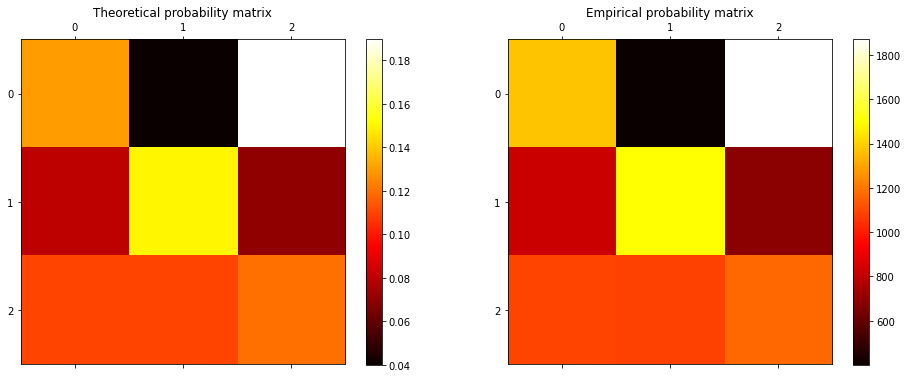

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.set_title('Theoretical probability matrix')
im1 = ax1.matshow(P, cmap='hot', interpolation='nearest')

ax2.set_title('Empirical probability matrix')
im2 = ax2.matshow(result, cmap='hot', interpolation='nearest')

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
print("Heatmaps are similar considering 10000 scale, which is equal to numbers count")